When epch 26, min val_loss is 44.31383514404297
When epch 282, min train_loss is 1.0839563608169556


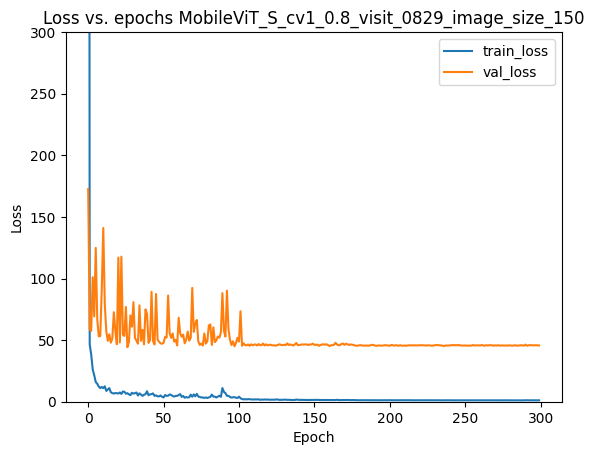

In [1]:
import pickle
import matplotlib.pyplot as plt
import re
history_filename='/home/yebi/ComputerVision_PLF/Pig_BW/Run/tmp/training_history_MobileViT_S_cv1_0.8_visit_0829_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_20.pkl'
# history_filename='/home/yebi/ComputerVision_PLF/Pig_BW/Run/tmp/training_history_MobileViT_S_cv2_0.75_visit_0912_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_10.pkl'
# history_filename='/home/yebi/ComputerVision_PLF/Pig_BW/Run/tmp/training_history_ResNet50_cv2_0_0.75_visit_0829_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_20.pkl'
# history_filename='/home/yebi/ComputerVision_PLF/Pig_BW/Run/tmp_cv1/training_history_MobileViT_S_visit_0829_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam.pkl'
title = re.findall(r'training_history_(.*?)_trainable', history_filename)[0]
with open(history_filename, 'rb') as file:
        training_history = pickle.load(file)

min_index = training_history["val_loss"].index(min(training_history["val_loss"]))
minn = min(training_history["val_loss"])
print(f"When epch {min_index}, min val_loss is {minn}")

trt_min_index = training_history["loss"].index(min(training_history["loss"]))
trt_minn = min(training_history["loss"])
print(f"When epch {trt_min_index}, min train_loss is {trt_minn}")


start_point = 0
end_point = 300
    # end_point = len(training_history['loss'])
plt.plot(range(start_point, end_point), training_history['loss'][start_point:end_point], label='train_loss')
plt.plot(range(start_point, end_point), training_history['val_loss'][start_point:end_point], label='val_loss')
plt.title(f'Loss vs. epochs {title}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,300)



plt.legend()
plt.show()

In file /home/yebi/ComputerVision_PLF/Pig_BW/Run/BestModelCV1/T1/training_history_MobileViT_XXS_visit_0718_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_20.pkl: 
 When epoch 273, min train_loss is 0.8750702142715454
In file /home/yebi/ComputerVision_PLF/Pig_BW/Run/BestModelCV1/T2/training_history_MobileViT_S_visit_0801_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_20.pkl: 
 When epoch 295, min train_loss is 0.6178529262542725
In file /home/yebi/ComputerVision_PLF/Pig_BW/Run/BestModelCV1/T3/training_history_MobileViT_S_visit_0815_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image_count_thr_20.pkl: 
 When epoch 295, min train_loss is 0.7580347657203674
In file /home/yebi/ComputerVision_PLF/Pig_BW/Run/BestModelCV1/T4/training_history_MobileViT_S_cv1_0.8_visit_0829_image_size_150_trainable_True_batch_size_100_epochs_300_lr_0.001_seed_42_opt_Adam_image

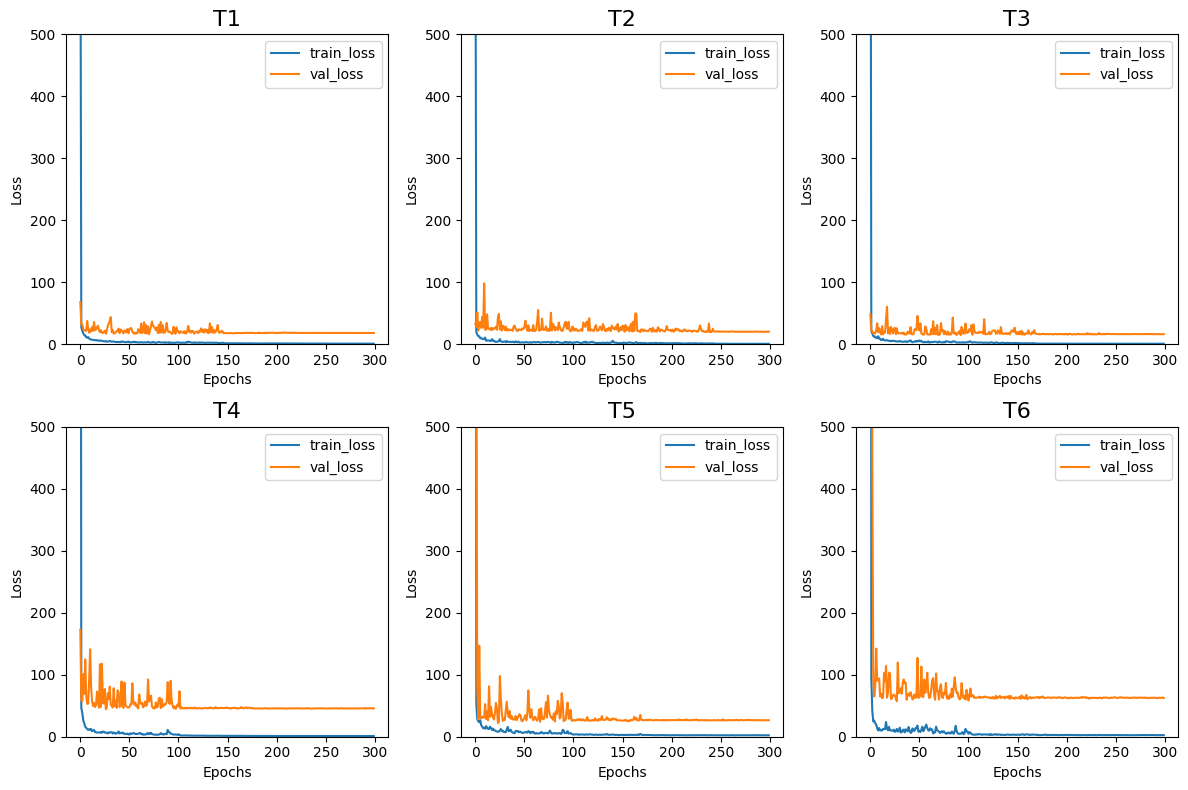

In [11]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import re
import textwrap

# Specify the directory path
directory_path = "/home/yebi/ComputerVision_PLF/Pig_BW/Run/BestModelCV1/"

# Initialize a list to store all .pkl files found
pkl_files = []

# List of subfolder names to search within directory_path
subfolders = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(directory_path, subfolder)
    
    # List all files in the current subfolder
    all_files = os.listdir(subfolder_path)
    
    # Filter the files ending with .pkl and containing '0927' in the name
    pkl_files.extend([os.path.join(subfolder_path, file) for file in all_files if file.endswith('.pkl') and file.startswith('training_history')])

# Define the number of rows and columns for the subplots
n_cols = 3  # For example, you can set this to any number of columns you want
n_rows = (len(pkl_files) + n_cols - 1) // n_cols  # Calculate the required number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

for idx, pkl_file in enumerate(pkl_files):
    file_path = os.path.join(directory_path, pkl_file)
    with open(file_path, 'rb') as file:
        # Load the training history from the pickle file
        training_history = pickle.load(file)
        
        # Check if 'val_loss' exists in the training history
        if 'val_loss' in training_history:
            # Calculate the minimum value and its index
            min_index = training_history['loss'].index(min(training_history['loss']))
            minn = min(training_history['loss'])
            
            # Set start and end points as proportions of the total number of epochs
            total_epochs = len(training_history['loss'])
            start_point = 0  # Start at 0% of total epochs
            end_point = total_epochs  # End at 100% of total epochs
            
            # title = re.findall(r'training_history_(.*?).pkl', file_path)[0]
            title = os.path.basename(os.path.dirname(pkl_file))
            wrapped_title = "\n".join(textwrap.wrap(title, width=30))
            
            ax = axes[idx]
            ax.plot(range(start_point, end_point), training_history['loss'][start_point:end_point], label='train_loss')
            ax.plot(range(start_point, end_point), training_history['val_loss'][start_point:end_point], label='val_loss')
            ax.set_title(f'{wrapped_title}', fontsize=16)
            ax.set_ylabel('Loss')
            ax.set_xlabel('Epochs')
            ax.set_ylim(0, 500)  # Set y-limit to remove extremely high values
            ax.legend()
            
            # Print the results
            print(f"In file {pkl_file}: \n When epoch {min_index}, min train_loss is {minn}")
        else:
            print(f"In file {pkl_file}: 'train_loss' not found in the training history")

# Hide any unused subplots
for ax in axes[len(pkl_files):]:
    ax.set_visible(False)

plt.tight_layout()
# Save the figure as a PDF
output_pdf_path = os.path.join("/home/yebi/ComputerVision_PLF/Pig_BW/Pig_BW_DL_beta/DL/DrawingPlots/loss_plots.pdf")
plt.savefig(output_pdf_path, format='pdf')

plt.show()